In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
class KNN(object):
    def __init__(self, k=3):
        self.k = k
        self.pontos = None
        self.rotulos = None

    # treinar o modelo
    def fit(self, X, y):
        self.pontos = X
        self.rotulos = y

    @staticmethod
    def dist(p, q):
        return np.sqrt(np.sum((p-q)**2))

    # classificar pontos da matriz X (exemplos,atributos)
    def predict(self, X):
        predicoes = []
        for p in X:
            #calcular a distância entre p e todos os pontos
            #do conjunto de treinamento
            d = [self.dist(p, q) for q in self.pontos]
            #retornar os indíces de d em ordem crescente de
            #distância
            dord = np.argsort(d)
            #pegar apenas os índices dos k vizinhos mais próximos
            knn = dord[:self.k]
            #pegar os rótulos dos k vizinhos mais próximos
            rotulos = self.rotulos[knn]
            #calcular a frequência dos rótulos dos vizinhos mais próximos
            rotulos, cont = np.unique(rotulos, return_counts=True)
            #a predição do ponto p é o rótulo majoritário
            pred = rotulos[np.argmax(cont)]
            predicoes.append(pred)

        return np.array(predicoes)


In [79]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [80]:
ds = load_iris(as_frame=True)

In [81]:
X = ds.data
y = ds.target
df = ds.frame

In [82]:
atributos = ["petal length (cm)", "petal width (cm)"]

In [83]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X[atributos], y, test_size=0.2, random_state=1, stratify=y
)

In [84]:
X_treino.shape, X_teste.shape

((120, 2), (30, 2))

In [85]:
knn = KNN(k=3)
knn.fit(X_treino.values, y_treino.values)
preds = knn.predict(X_teste.values)

%timeit pred = knn.predict(X_teste.values)

28.8 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [86]:
print("Acurácia no teste: %.2f" % (accuracy_score(y_teste, preds)))

Acurácia no teste: 0.97


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

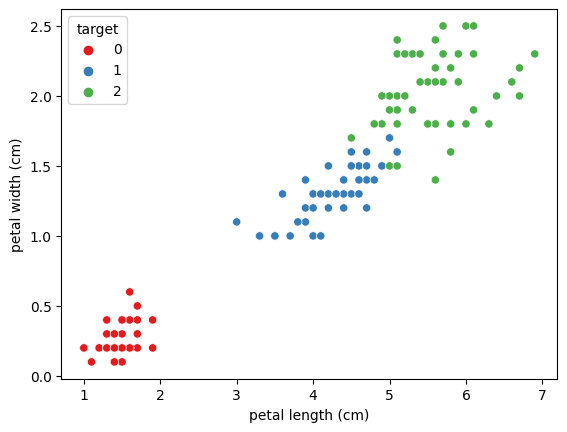

In [87]:
sns.scatterplot(data=df, x=atributos[0],
                y=atributos[1], hue=y, palette="Set1")

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino, y_treino)
pred = knn.predict(X_teste)

In [95]:
# %timeit pred = knn.predict(X_teste)

In [96]:
def plotar_instancias(X_treino, y_treino, X_teste, y_teste, cmap=None, ax=None):
    if cmap is None:
        cmap = ['darkorange', 'c', 'darkblue']
    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))
    ax.scatter(X_treino[y_treino==0,0], X_treino[y_treino==0,1],
               c=cmap[0], label='setosa (treino)')
    ax.scatter(X_treino[y_treino==1,0], X_treino[y_treino==1,1],
               c=cmap[1], label='versicolor (treino)')
    ax.scatter(X_treino[y_treino==2,0], X_treino[y_treino==2,1],
               c=cmap[2], label='virginica (treino)')

    ax.scatter(X_teste[y_teste==0,0], X_teste[y_teste==0,1],
               c=cmap[0], marker='x', label='setosa (teste)')
    ax.scatter(X_teste[y_teste==1,0], X_teste[y_teste==1,1],
               c=cmap[1], marker='x', label='versicolor (teste)')
    ax.scatter(X_teste[y_teste==2,0], X_teste[y_teste==2,1],
               c=cmap[2], marker='x', label='virginica (teste)')
    ax.legend(loc='best')

    return ax

In [97]:
from matplotlib.colors import ListedColormap

def plotar_fronteira_decisao(classificador, X_treino, y_treino, X_teste, y_teste, ax=None):

    #criar um mapa de cores de forma que a fronteira de decisão seja clara
    #e os pontos das classes correspondentes sejam da mesma cor, mas mais escuros.
    cmap_claro = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_escuro = ['darkorange', 'c', 'darkblue']

    #passo do grid de predições. Quanto menor, melhor a resolução, mas mais demorado pra calcular.
    grafico_delta = 0.02

    #Criar o grid de predições. Pra prática estamos criando pontos no
    # espaço de atributos para fazer as predições. Estas predições são
    # usadas depois para fazer um gráfico de contornos preenchido com
    # as regiões da cor de cada classe.
    xmin, xmax = X_treino[:,0].min() - 0.5, X_treino[:,0].max() + 0.5
    ymin, ymax = X_treino[:,1].min() - 0.5 , X_treino[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(xmin, xmax, grafico_delta),
                         np.arange(ymin, ymax, grafico_delta))

    #Realizar as predições dos exemplos gerados acima.
    pred_grafico = classificador.predict(np.c_[xx.ravel(), yy.ravel()])
    pred_grafico = pred_grafico.reshape(xx.shape)

    if ax is None:
        _, ax = plt.subplots(figsize=(8,6))

    #Plotar o gráfico de contornos
    ax.contourf(xx,yy,pred_grafico, cmap=cmap_claro)

    #Plotar as instâncias
    plotar_instancias(X_treino, y_treino, X_teste, y_teste, cmap_escuro, ax=ax)

    #ajeitar os limites dos eixos e seus rótulos.
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(df.columns[0])
    ax.set_ylabel(df.columns[1])

    return ax

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

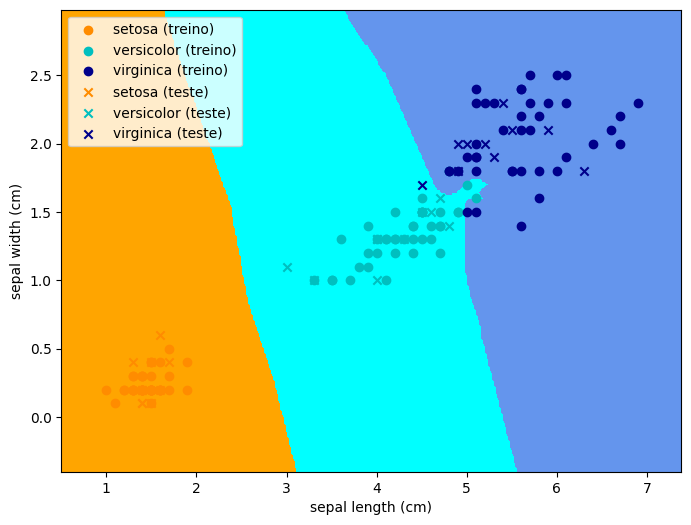

In [98]:
plotar_fronteira_decisao(knn, X_treino.values, y_treino, X_teste.values, y_teste )

# Usando os 4 atributos

In [100]:
X = ds.data
y = ds.target

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y.values)

In [103]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_treino.values, y_treino.values)
pred =  knn.predict(X_teste.values)

In [104]:
print("Acurácia: %.2f" % (accuracy_score(y_teste, pred)))

Acurácia: 0.97
